In [1]:
import pandas as pd
import os
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

from get_mask_size import mask_generator


In [2]:
# CSV-Datei einlesen
df = pd.read_csv("mask_sizes.csv")

In [3]:
# Statistiken der weißen Pixel anschauen
print(df["white_pixel_percentage"].describe([0.1, 0.25, 0.33, 0.5, 0.67, 0.75, 0.9]))


count    1002.000000
mean       10.472924
std        10.022617
min         0.006094
10%         1.680527
25%         3.794486
33%         4.778570
50%         7.403350
67%        11.032552
75%        13.446489
90%        23.429929
max        61.682141
Name: white_pixel_percentage, dtype: float64


In [4]:
# Quartile berechnen
q1 = df["white_pixel_percentage"].quantile(0.33)  # 25%-Quartil
q3 = df["white_pixel_percentage"].quantile(0.67)  # 75%-Quartil


In [5]:
def categorize_size(pixel_count_percentage):
    if pixel_count_percentage <= q1:
        return "klein"
    elif pixel_count_percentage <= q3:
        return "mittel"
    else:
        return "groß"


In [6]:
# Neue Spalte mit Kategorien hinzufügen
df["mask_category"] = df["white_pixel_percentage"].apply(categorize_size)


In [7]:
# Neue CSV speichern
df.to_csv("mask_sizes_with_category.csv", index=False)


In [8]:
df.head()

,Bildname,Maskengröße (weiße Pixel),white_pixel_percentage,mask_category
0,ADE_train_00003173.jpg,8457,4.510400,klein
1,ADE_train_00023741.jpg,19368,0.601752,klein
2,ADE_train_00022732.jpg,159556,22.846980,groß
3,ADE_train_00001504.jpg,2248,1.350150,klein
4,ADE_frame_00000204.jpg,12808,4.815038,mittel


In [9]:
# Wie viele Bilder in jeder kategorie: 

df["mask_category"].value_counts()

mask_category
mittel    340
klein     331
groß      331
Name: count, dtype: int64

In [10]:
def show_images(image_files, category, masks_dir):
    """
    Zeigt die ausgewählten Bilder einer Kategorie an.

    Args:
    - image_files (list): Liste der Dateinamen der ausgewählten Bilder.
    - category (str): Die Kategorie der Bilder.
    - masks_dir (str): Verzeichnis der Maskenbilder.
    """
    plt.figure(figsize=(15, 10))
    plt.suptitle(f"Kategorie: {category}", fontsize=16)
    
    for i, (fname, mask) in enumerate(mask_generator(masks_dir, image_files)):
        plt.subplot(3, 5, i + 1)
        plt.imshow(mask, cmap='gray')
        plt.title(fname)
        plt.axis('off')
    
    plt.tight_layout()
    plt.show()

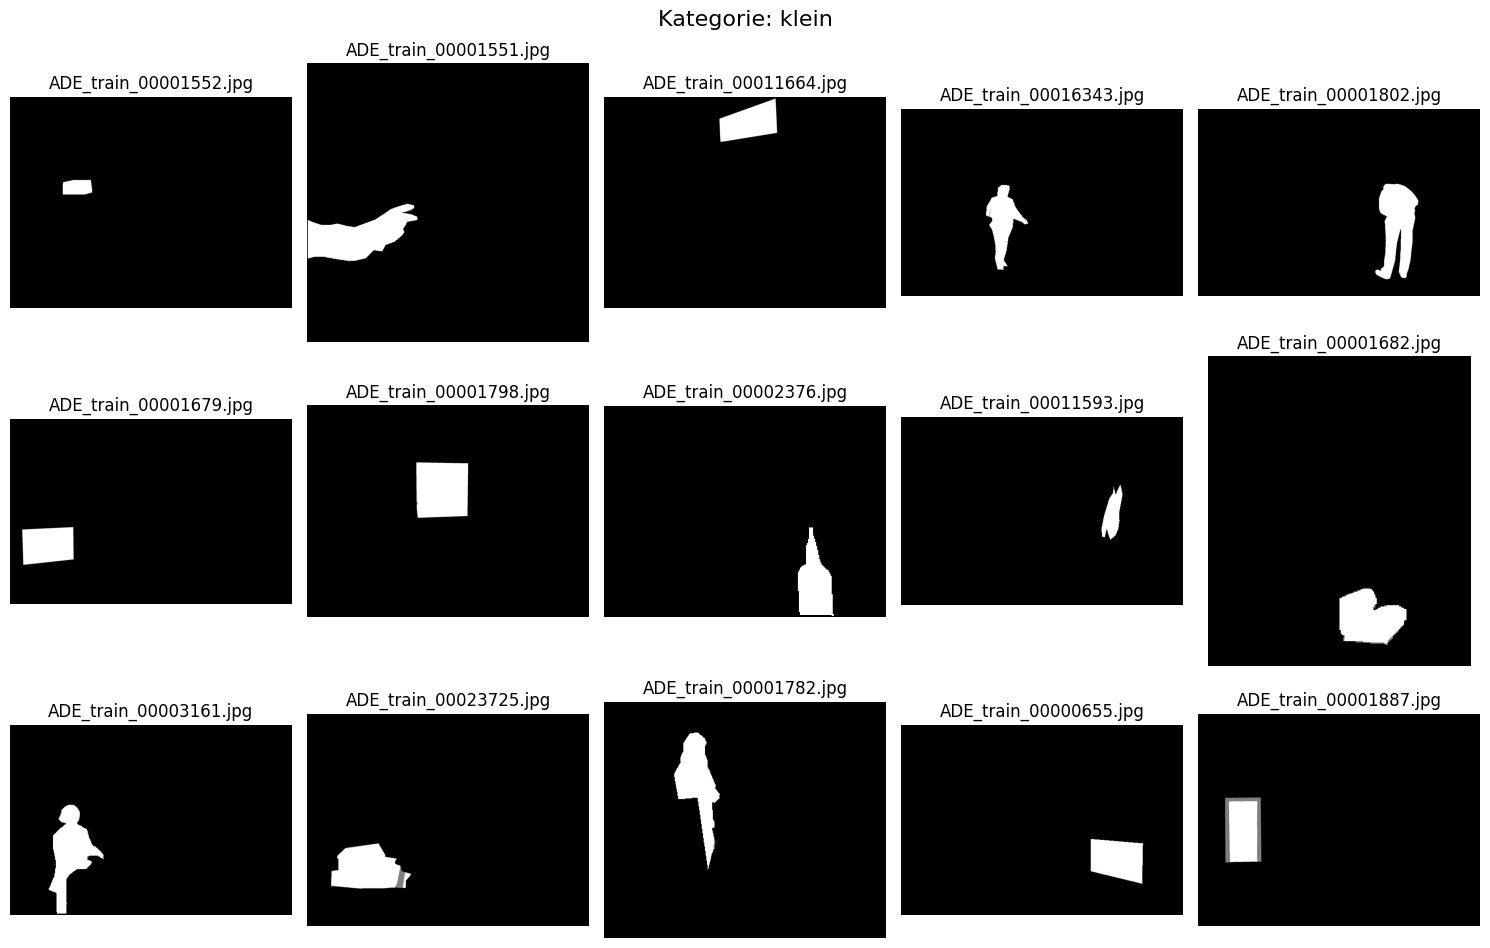

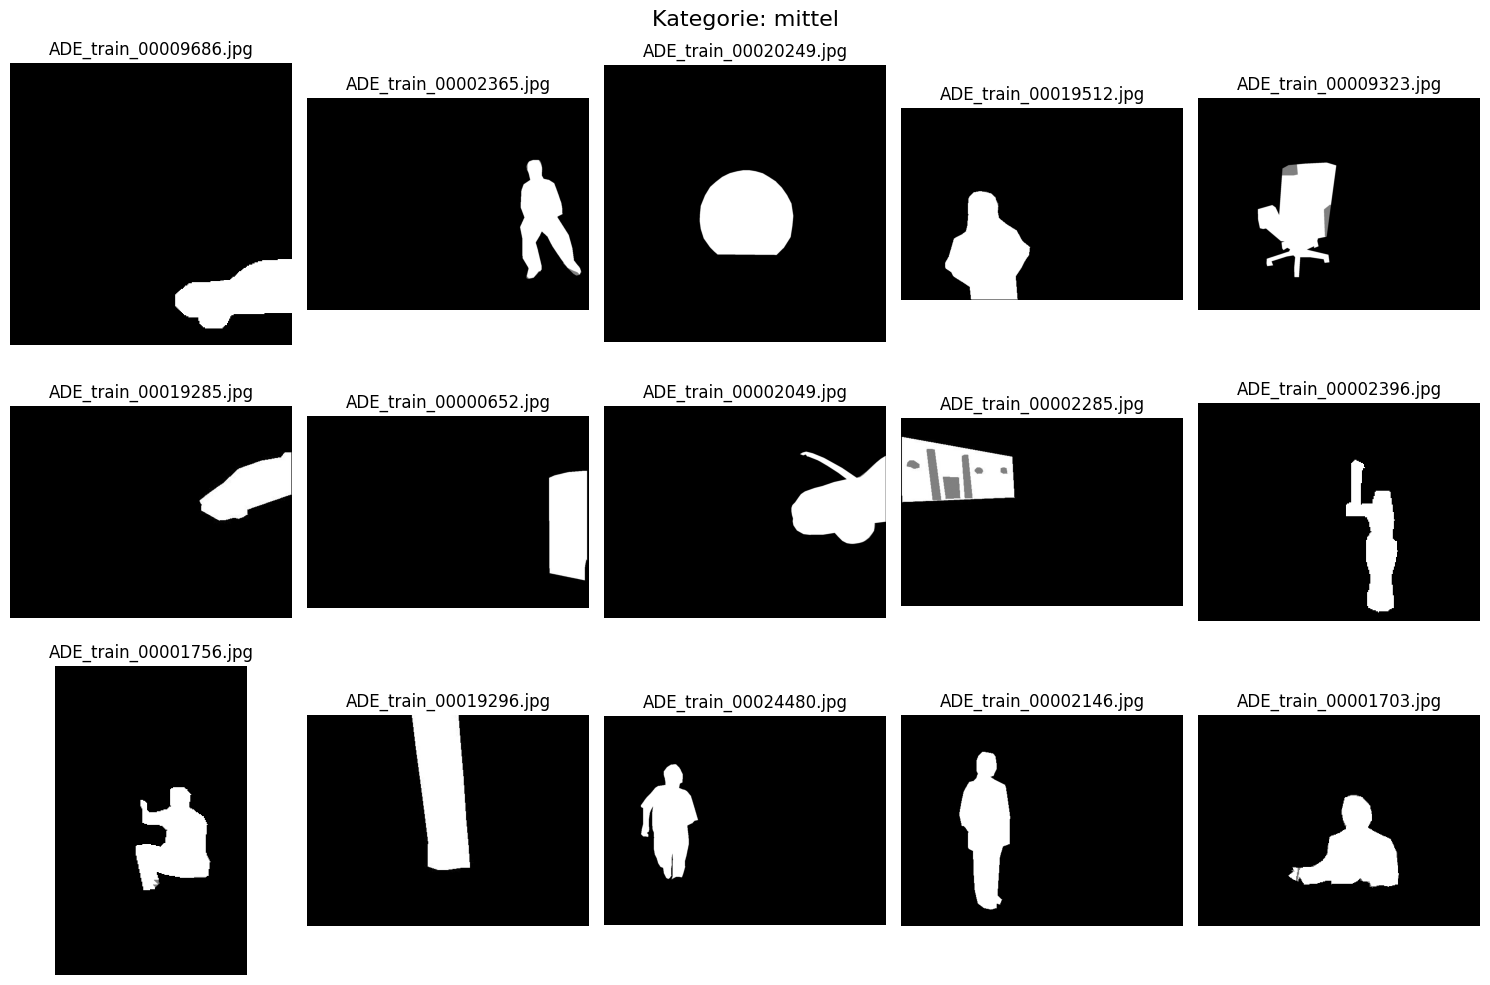

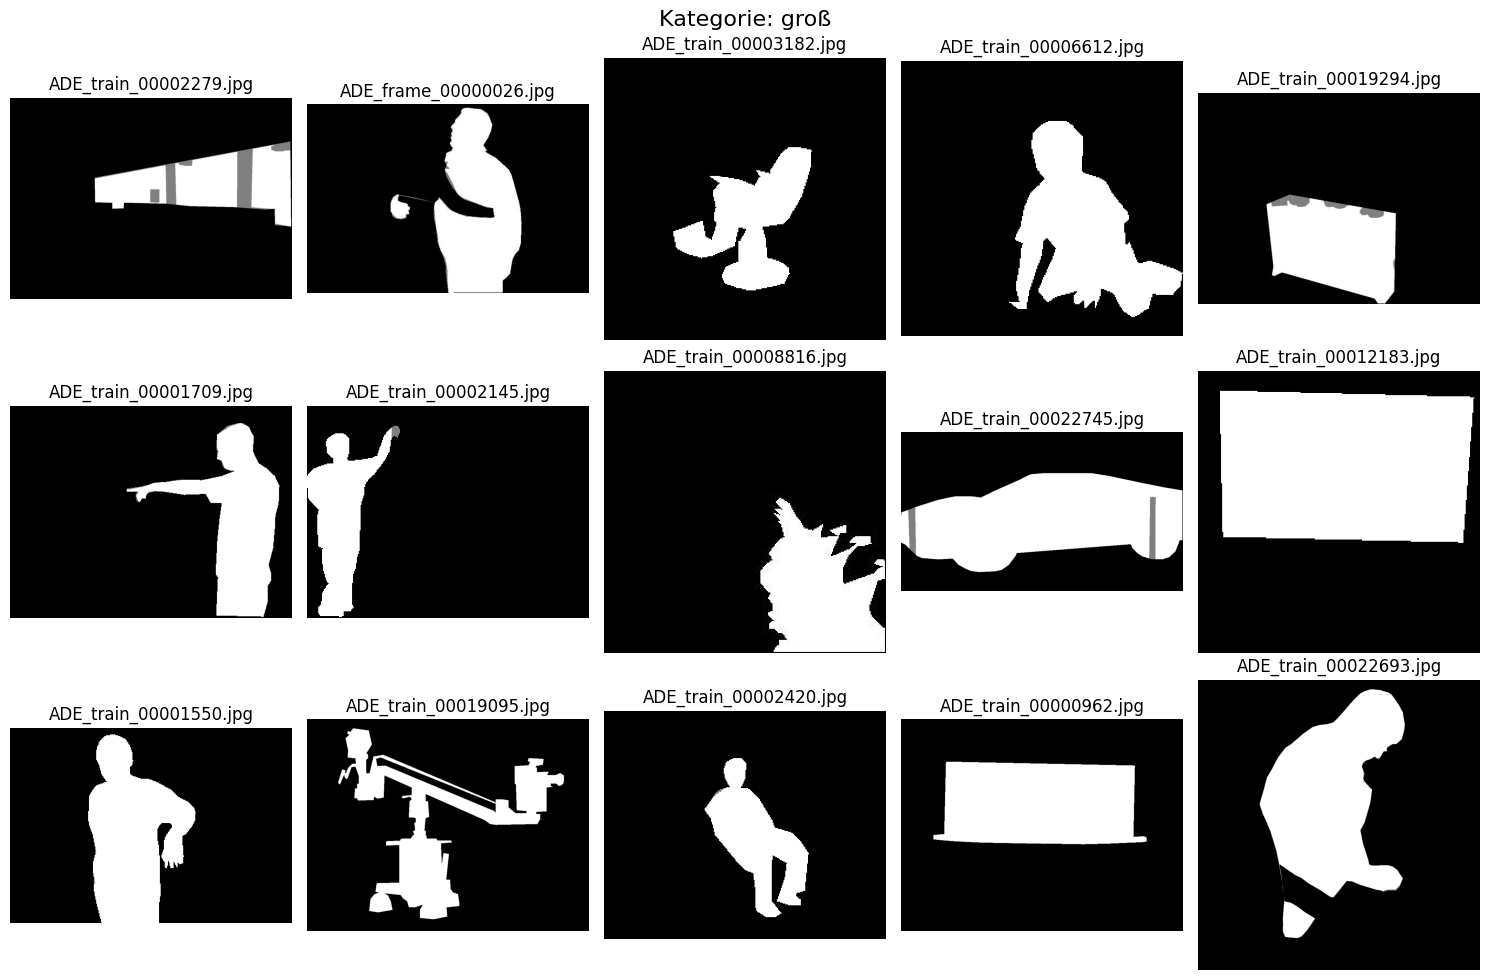

In [11]:
# 15 zufällige Bilder pro Kategorie auswählen
categories = ["klein", "mittel", "groß"]
selected_images = {}

for category in categories:
    sample = df[df["mask_category"] == category].sample(15, random_state=42)
    selected_images[category] = sample["Bildname"].tolist()

# Pfad zum Masken-Verzeichnis
masks_directory = "Dataset_new/masks"

# Bilder anzeigen
for category, images in selected_images.items():
    show_images(images, category, masks_directory)

